In [ ]:
!gdown --id '15EWQ3adcKsWdxIdJdSu9x_msWxbxxz6l'
from silhoutte import silhoutte_analysis

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=15EWQ3adcKsWdxIdJdSu9x_msWxbxxz6l
To: /content/silhoutte.py
100% 4.34k/4.34k [00:00<00:00, 5.73MB/s]


# Customer Segmentation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import cluster
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
df_all = pd.read_csv('https://docs.google.com/spreadsheets/d/1xJOdFDUrIqurN0Z2tMMoNIzBZeczTVFeKBYF4x1uGXs/export?format=csv&gid=1666317604')
df_all

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,3149,sao paulo,SP,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,3149,sao paulo,SP,3,voucher,1,2.0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,3149,sao paulo,SP,2,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,47813,barreiras,BA,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,75265,vianopolis,GO,1,credit_card,3,179.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
93102,880675dff2150932f1601e1c07eadeeb,47cd45a6ac7b9fb16537df2ccffeb5ac,delivered,2017-02-23 09:05:12,2017-02-23 09:15:11,2017-03-06 11:08:08,5127,sao paulo,SP,1,credit_card,3,155.99
93103,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-17 15:08:01,12209,sao jose dos campos,SP,1,credit_card,3,85.08
93104,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-28 17:37:56,11722,praia grande,SP,1,credit_card,3,195.0
93105,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-09-21 11:24:17,45920,nova vicosa,BA,1,credit_card,5,271.01


In [ ]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93107 entries, 0 to 93106
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       93107 non-null  object 
 1   customer_id                    93107 non-null  object 
 2   order_status                   93107 non-null  object 
 3   order_purchase_timestamp       93107 non-null  object 
 4   order_approved_at              93107 non-null  object 
 5   order_delivered_customer_date  93107 non-null  object 
 6   customer_zip_code_prefix       93107 non-null  int64  
 7   customer_city                  93107 non-null  object 
 8   customer_state                 93107 non-null  object 
 9   payment_sequential             93107 non-null  int64  
 10  payment_type                   93107 non-null  object 
 11  payment_installments           93107 non-null  int64  
 12  payment_value                  93107 non-null 

In [ ]:
dfd_all = df_all.copy()

In [ ]:
#change data type 
#int ke datetime
date_order = ['order_purchase_timestamp','order_approved_at','order_delivered_customer_date']

for i in date_order:
  dfd_all[i] = pd.to_datetime(dfd_all[i])
  
dfd_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93107 entries, 0 to 93106
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       93107 non-null  object        
 1   customer_id                    93107 non-null  object        
 2   order_status                   93107 non-null  object        
 3   order_purchase_timestamp       93107 non-null  datetime64[ns]
 4   order_approved_at              93107 non-null  datetime64[ns]
 5   order_delivered_customer_date  93107 non-null  datetime64[ns]
 6   customer_zip_code_prefix       93107 non-null  int64         
 7   customer_city                  93107 non-null  object        
 8   customer_state                 93107 non-null  object        
 9   payment_sequential             93107 non-null  int64         
 10  payment_type                   93107 non-null  object        
 11  payment_install

In [ ]:
#change payment value to integer 
dfd_all['payment_value'] = dfd_all['payment_value'].astype(int)
dfd_all

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,3149,sao paulo,SP,1,credit_card,1,18
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,3149,sao paulo,SP,3,voucher,1,2
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,3149,sao paulo,SP,2,voucher,1,18
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,47813,barreiras,BA,1,boleto,1,141
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,75265,vianopolis,GO,1,credit_card,3,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...
93102,880675dff2150932f1601e1c07eadeeb,47cd45a6ac7b9fb16537df2ccffeb5ac,delivered,2017-02-23 09:05:12,2017-02-23 09:15:11,2017-03-06 11:08:08,5127,sao paulo,SP,1,credit_card,3,155
93103,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-17 15:08:01,12209,sao jose dos campos,SP,1,credit_card,3,85
93104,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-28 17:37:56,11722,praia grande,SP,1,credit_card,3,195
93105,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-09-21 11:24:17,45920,nova vicosa,BA,1,credit_card,5,271


In [ ]:
dfd_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93107 entries, 0 to 93106
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       93107 non-null  object        
 1   customer_id                    93107 non-null  object        
 2   order_status                   93107 non-null  object        
 3   order_purchase_timestamp       93107 non-null  datetime64[ns]
 4   order_approved_at              93107 non-null  datetime64[ns]
 5   order_delivered_customer_date  93107 non-null  datetime64[ns]
 6   customer_zip_code_prefix       93107 non-null  int64         
 7   customer_city                  93107 non-null  object        
 8   customer_state                 93107 non-null  object        
 9   payment_sequential             93107 non-null  int64         
 10  payment_type                   93107 non-null  object        
 11  payment_install

In [ ]:
dfd_all.describe()

,customer_zip_code_prefix,payment_sequential,payment_installments,payment_value
count,"93,107.0","93,107.0","93,107.0","93,107.0"
mean,"34,751.9687671174",1.0948263825491102,2.629372657265297,109.54129120259486
std,"29,749.35559116946",0.6779559545371163,2.4512964599128684,72.66657218724842
min,"1,003.0",1.0,0.0,0.0
25%,"11,060.0",1.0,1.0,54.0
50%,"24,220.0",1.0,1.0,92.0
75%,"57,730.0",1.0,3.0,150.0
max,"99,980.0",26.0,24.0,344.0


In [ ]:
dfd_all.describe(exclude=np.number)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,customer_city,customer_state,payment_type
count,93107,93107,93107,93107,93107,93107,93107,93107,93107
unique,88962,88962,2,88495,81838,88267,3965,27,4
top,ccf804e764ed5650cd8759557269dc13,92cd3ec6e2d643d4ebd0e3d6238f69e2,delivered,2017-06-07 12:05:10,2017-06-09 16:15:08,2017-06-22 16:04:46,sao paulo,SP,credit_card
freq,26,26,93101,26,26,26,14741,39707,68326
first,NaN,NaN,NaN,2016-10-03 09:44:50,2016-10-04 09:43:32,2016-10-11 13:46:32,NaN,NaN,NaN
last,NaN,NaN,NaN,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-10-17 13:22:46,NaN,NaN,NaN


In [ ]:
dfd_all = dfd_all[dfd_all['payment_installments']!=0]
dfd_all

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,3149,sao paulo,SP,1,credit_card,1,18
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,3149,sao paulo,SP,3,voucher,1,2
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,3149,sao paulo,SP,2,voucher,1,18
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,47813,barreiras,BA,1,boleto,1,141
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,75265,vianopolis,GO,1,credit_card,3,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...
93102,880675dff2150932f1601e1c07eadeeb,47cd45a6ac7b9fb16537df2ccffeb5ac,delivered,2017-02-23 09:05:12,2017-02-23 09:15:11,2017-03-06 11:08:08,5127,sao paulo,SP,1,credit_card,3,155
93103,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-17 15:08:01,12209,sao jose dos campos,SP,1,credit_card,3,85
93104,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-28 17:37:56,11722,praia grande,SP,1,credit_card,3,195
93105,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-09-21 11:24:17,45920,nova vicosa,BA,1,credit_card,5,271


In [ ]:
dfd_all = dfd_all[dfd_all['payment_value']!=0]
dfd_all

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,3149,sao paulo,SP,1,credit_card,1,18
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,3149,sao paulo,SP,3,voucher,1,2
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,3149,sao paulo,SP,2,voucher,1,18
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,47813,barreiras,BA,1,boleto,1,141
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,75265,vianopolis,GO,1,credit_card,3,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...
93102,880675dff2150932f1601e1c07eadeeb,47cd45a6ac7b9fb16537df2ccffeb5ac,delivered,2017-02-23 09:05:12,2017-02-23 09:15:11,2017-03-06 11:08:08,5127,sao paulo,SP,1,credit_card,3,155
93103,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-17 15:08:01,12209,sao jose dos campos,SP,1,credit_card,3,85
93104,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-28 17:37:56,11722,praia grande,SP,1,credit_card,3,195
93105,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-09-21 11:24:17,45920,nova vicosa,BA,1,credit_card,5,271


In [ ]:
dfd_all.describe()

,customer_zip_code_prefix,payment_sequential,payment_installments,payment_value
count,"92,958.0","92,958.0","92,958.0","92,958.0"
mean,"34,758.01161815013",1.0926009595731405,2.6320058521052516,109.71486047462295
std,"29,751.932632549935",0.6625120375826001,2.452372701987566,72.59377723864422
min,"1,003.0",1.0,1.0,1.0
25%,"11,060.0",1.0,1.0,54.0
50%,"24,220.0",1.0,1.0,92.0
75%,"57,900.0",1.0,3.0,150.0
max,"99,980.0",26.0,24.0,344.0


In [ ]:
df_ds = dfd_all.describe()
df_ds

,customer_zip_code_prefix,payment_sequential,payment_installments,payment_value
count,"92,958.0","92,958.0","92,958.0","92,958.0"
mean,"34,758.01161815013",1.0926009595731405,2.6320058521052516,109.71486047462295
std,"29,751.932632549935",0.6625120375826001,2.452372701987566,72.59377723864422
min,"1,003.0",1.0,1.0,1.0
25%,"11,060.0",1.0,1.0,54.0
50%,"24,220.0",1.0,1.0,92.0
75%,"57,900.0",1.0,3.0,150.0
max,"99,980.0",26.0,24.0,344.0


In [ ]:
pd.set_option('display.float_format',  '{:,}'.format)

In [ ]:
df_ds = round(df_ds,0)
df_ds

,customer_zip_code_prefix,payment_sequential,payment_installments,payment_value
count,"92,958.0","92,958.0","92,958.0","92,958.0"
mean,"34,758.0",1.0,3.0,110.0
std,"29,752.0",1.0,2.0,73.0
min,"1,003.0",1.0,1.0,1.0
25%,"11,060.0",1.0,1.0,54.0
50%,"24,220.0",1.0,1.0,92.0
75%,"57,900.0",1.0,3.0,150.0
max,"99,980.0",26.0,24.0,344.0


Data Overview:

There are 92,958 user in the dataset

Mean payment_value is 110 with min payment_value 1 and max payment_value 344

Most of the user living in Sao Paulo and most of user using payment type credit_card

In [ ]:
df_cluster = dfd_all.copy()

Creating RFM Score

In [ ]:
#Days since the last purchase

max_date = dfd_all.groupby('customer_id')['order_approved_at'].max().reset_index()
max_date = max_date.rename({'order_approved_at':'most_recent'},axis = 1)
max_date.head()

,customer_id,most_recent
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:35:32
1,000161a058600d5901f007fab4c27140,2017-07-16 09:55:12
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:15:20
3,0002414f95344307404f0ace7a26f1d5,2017-08-17 03:10:27
4,000379cdec625522490c315e70c7a9fb,2018-04-04 03:10:19


In [ ]:
max_date['r_score'] = (max_date['most_recent'].max() - max_date['most_recent']).dt.days
max_date.head()

,customer_id,most_recent,r_score
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:35:32,287
1,000161a058600d5901f007fab4c27140,2017-07-16 09:55:12,409
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:15:20,547
3,0002414f95344307404f0ace7a26f1d5,2017-08-17 03:10:27,377
4,000379cdec625522490c315e70c7a9fb,2018-04-04 03:10:19,147


In [ ]:
n_transaction = dfd_all.groupby('customer_id')['order_id'].count().reset_index()
n_transaction = n_transaction.rename({'order_id':'f_score'},axis = 1)
n_transaction.head(10)

,customer_id,f_score
0,00012a2ce6f8dcda20d059ce98491703,1
1,000161a058600d5901f007fab4c27140,1
2,0001fd6190edaaf884bcaf3d49edf079,1
3,0002414f95344307404f0ace7a26f1d5,1
4,000379cdec625522490c315e70c7a9fb,1
5,0004164d20a9e969af783496f3408652,1
6,000419c5494106c306a97b5635748086,1
7,00046a560d407e99b969756e0b10f282,1
8,00050bf6e01e69d5c0fd612f1bcfb69c,1
9,0005aefbb696d34b3424dccd0a0e9fd0,1


In [ ]:
avg_purchase = dfd_all.groupby('customer_id')['payment_value'].mean().reset_index()
avg_purchase = avg_purchase.rename({'payment_value':'m_score'},axis = 1)
avg_purchase.head()

,customer_id,m_score
0,00012a2ce6f8dcda20d059ce98491703,114.0
1,000161a058600d5901f007fab4c27140,67.0
2,0001fd6190edaaf884bcaf3d49edf079,195.0
3,0002414f95344307404f0ace7a26f1d5,179.0
4,000379cdec625522490c315e70c7a9fb,107.0


In [ ]:
avg_purchase['customer_id'].nunique()

88960

In [ ]:
gb = max_date.merge(n_transaction, how = 'left', on = 'customer_id')
gb = gb.merge(avg_purchase, how = 'left', on = 'customer_id')
gb

,customer_id,most_recent,r_score,f_score,m_score
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:35:32,287,1,114.0
1,000161a058600d5901f007fab4c27140,2017-07-16 09:55:12,409,1,67.0
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:15:20,547,1,195.0
3,0002414f95344307404f0ace7a26f1d5,2017-08-17 03:10:27,377,1,179.0
4,000379cdec625522490c315e70c7a9fb,2018-04-04 03:10:19,147,1,107.0
...,...,...,...,...,...
88955,fffcb937e9dd47a13f05ecb8290f4d3e,2018-03-17 01:35:21,165,1,91.0
88956,fffecc9f79fd8c764f843e9951b11341,2018-03-29 17:10:27,152,2,40.0
88957,fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:54:37,99,1,63.0
88958,ffff42319e9b2d713724ae527742af25,2018-06-13 17:20:23,76,1,214.0


In [ ]:
dfd_rfm = gb[['customer_id','r_score','f_score','m_score']]
dfd_rfm

,customer_id,r_score,f_score,m_score
0,00012a2ce6f8dcda20d059ce98491703,287,1,114.0
1,000161a058600d5901f007fab4c27140,409,1,67.0
2,0001fd6190edaaf884bcaf3d49edf079,547,1,195.0
3,0002414f95344307404f0ace7a26f1d5,377,1,179.0
4,000379cdec625522490c315e70c7a9fb,147,1,107.0
...,...,...,...,...
88955,fffcb937e9dd47a13f05ecb8290f4d3e,165,1,91.0
88956,fffecc9f79fd8c764f843e9951b11341,152,2,40.0
88957,fffeda5b6d849fbd39689bb92087f431,99,1,63.0
88958,ffff42319e9b2d713724ae527742af25,76,1,214.0


In [ ]:
features = dfd_rfm.drop('customer_id',axis = 1)
scale = StandardScaler()
features_scaled = scale.fit_transform(features)
features_scaled

array([[ 0.31727601, -0.12163505,  0.01982799],
       [ 1.11690953, -0.12163505, -0.63557046],
       [ 2.02141302, -0.12163505,  1.14934447],
       ...,
       [-0.91494613, -0.12163505, -0.69134905],
       [-1.06569672, -0.12163505,  1.41429278],
       [ 0.80229962, -0.12163505, -0.94235271]])

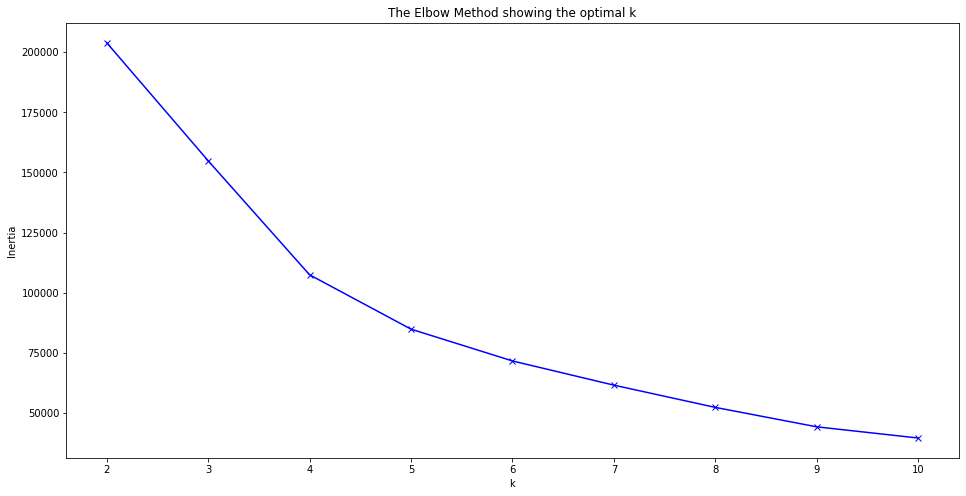

In [ ]:
distortions = []
K = range(2,11)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k)
    kmeanModel.fit(features_scaled)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
cluster_model = cluster.KMeans(n_clusters=4)
cluster_model.fit(features_scaled)
cluster_label = cluster_model.labels_
dfd_rfm['cluster'] = cluster_label
dfd_rfm

,customer_id,r_score,f_score,m_score,cluster
0,00012a2ce6f8dcda20d059ce98491703,287,1,114.0,3
1,000161a058600d5901f007fab4c27140,409,1,67.0,3
2,0001fd6190edaaf884bcaf3d49edf079,547,1,195.0,3
3,0002414f95344307404f0ace7a26f1d5,377,1,179.0,1
4,000379cdec625522490c315e70c7a9fb,147,1,107.0,0
...,...,...,...,...,...
88955,fffcb937e9dd47a13f05ecb8290f4d3e,165,1,91.0,0
88956,fffecc9f79fd8c764f843e9951b11341,152,2,40.0,0
88957,fffeda5b6d849fbd39689bb92087f431,99,1,63.0,0
88958,ffff42319e9b2d713724ae527742af25,76,1,214.0,1


In [ ]:
dfd_analysis = dfd_rfm.groupby('cluster').mean()
dfd_analysis

,r_score,f_score,m_score
cluster,,,
0,128.2406284383716,1.0345180522504542,79.18013442167124
1,216.53920836445107,1.0043315907393577,219.47030951788236
2,276.4105691056911,6.186991869918699,25.60291279407133
3,399.22482063083794,1.0435224042236362,84.81619173322504


In [ ]:
dfd_analysis['#users'] = dfd_rfm[['cluster','f_score']].groupby(['cluster']).count()
dfd_analysis['Percentage'] = dfd_analysis['#users'] / dfd_analysis['#users'].sum()*100
dfd_analysis

,r_score,f_score,m_score,#users,Percentage
cluster,,,,,
0,128.2406284383716,1.0345180522504542,79.18013442167124,39081,43.93098021582734
1,216.53920836445107,1.0043315907393577,219.47030951788236,20085,22.57756294964029
2,276.4105691056911,6.186991869918699,25.60291279407133,246,0.27652877697841727
3,399.22482063083794,1.0435224042236362,84.81619173322504,29548,33.214928057553955


In [ ]:
pd.set_option('display.float_format',  '{:,}'.format)

In [ ]:
dfd_analysis = round(dfd_analysis,2)
dfd_analysis

,r_score,f_score,m_score,#users,Percentage
cluster,,,,,
0,128.24,1.03,79.18,39081,43.93
1,216.54,1.0,219.47,20085,22.58
2,276.41,6.19,25.6,246,0.28
3,399.22,1.04,84.82,29548,33.21


Insight : 

cluster 0 = Have the most users, and most recent transactions but mostly didn't repert the transactions

cluster 1 = have the most payment value, but didn't repert the transactions

cluster 2 = Customer that did multiple transactions, but only a small number of people are in this cluster (less than 1%)

cluster 3 =Customers that has not been doing transaction for the longest time and didn/t repert the transaction 

Recomendation =

Based on the clustering above, the number of repeat customers is very low, so we recommend developing an advertising and marketing strategy. such as giving discounts or attractive promotions

for example, giving a discount at the end of the month, or providing benefits for every customer who becomes a member